# "Wine Quality."

### _"Quality ratings of Portuguese white wines" (Classification task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains 12 columns and 4898 entries of data about Portuguese white wines.
    
**Metadata:**
    
* **fixed acidity** 

* **volatile acidity**

* **citric acid** 

* **residual sugar** 

* **chlorides** 

* **free sulfur dioxide** 

* **total sulfur dioxide**

* **density** 

* **pH** 

* **sulphates** 

* **alcohol** 

* **quality** - score between 3 and 9


### Questions:
    
Predict which wines are 'Good/1' and 'Not Good/0' (use binary classification; check balance of classes; calculate perdictions; choose the best model)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head, Describe
* ### Encoding 'quality' attribute
* ### 'quality' attribute value counts and visualisation
* ### Resampling of an imbalanced dataset
* ### Random under-sampling of an imbalanced dataset
* ### Random over-sampling of an imbalanced dataset
* ### Initialisation of target
* ### Drop column 'quality'

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### StandardScaler
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### Build, train and evaluate models without hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score
* ### Build, train and evaluate models with hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score

## [Conclusion](#Conclusion.)



## Part 1: Import, Load Data.

* ### Import libraries

In [3]:
# import standard libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

* ### Read data from ‘.csv’ file

In [4]:
# read data from '.csv' file
data = pd.read_csv('winequality.csv')

## Part 2: Exploratory Data Analysis.

* ### Info

In [5]:
# print the full summary of the dataset  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


* ### Head

In [6]:
# preview of the first 5 lines of the loaded data 
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


* ### Describe

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


* ### Encoding 'quality' attribute

In [8]:
# lambda function; wine quality from 3-6 == 0, from 7-9 == 1.
data['quality'] = data.quality.apply(lambda q: 0 if q <=6 else 1) 

In [9]:
# preview of the first 5 lines of the loaded data 
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


* ### 'quality' attribute value counts and visualisation

In [11]:
print('Not good wine', round(data['quality'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Good wine', round(data['quality'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

data['quality'].value_counts()

Not good wine 78.36 % of the dataset
Good wine 21.64 % of the dataset


0    3838
1    1060
Name: quality, dtype: int64

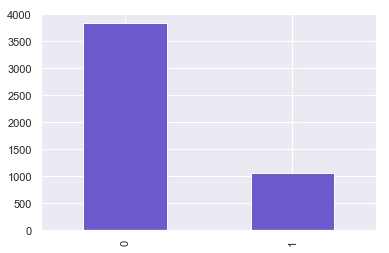

In [20]:
# visualisation plot
data['quality'].value_counts().plot(x = data['quality'], kind='bar', color = "slateblue")

* ### Resampling of an imbalanced dataset

In [21]:
# class count
count_class_0, count_class_1 = data.quality.value_counts()

# divide by class
class_0 = data[data.quality == 0]
class_1 = data[data.quality == 1]

* ### Random under-sampling of an imbalanced dataset

Random under-sampling:
1    1060
0    1060
Name: quality, dtype: int64


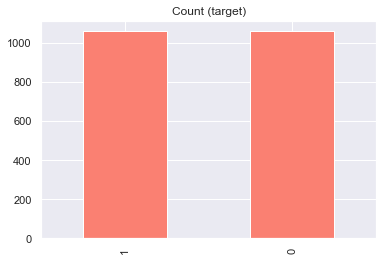

In [22]:
class_0_under = class_0.sample(count_class_1)
data_under = pd.concat([class_0_under, class_1], axis=0)

print('Random under-sampling:')
print(data_under.quality.value_counts())

data_under.quality.value_counts().plot(kind='bar', title='Count (target)', color = 'salmon')

* ### Random over-sampling of an imbalanced dataset

Random over-sampling:
1    3838
0    3838
Name: quality, dtype: int64


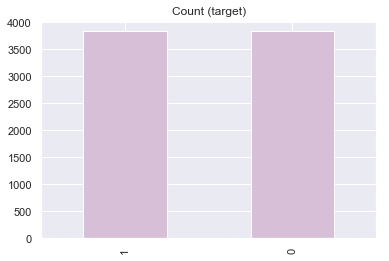

In [29]:
class_1_over = class_1.sample(count_class_0, replace=True)
data_over = pd.concat([class_0, class_1_over], axis=0)

print('Random over-sampling:')
print(data_over.quality.value_counts())

data_over.quality.value_counts().plot(kind='bar', title='Count (target)', color = 'thistle')

* ### Initialisation of target

In [31]:
# initialisation of target
target = data['quality']

# for under-sampling dataset
#target_under = data_under['quality']

# for over-sampling dataset
#target_over = data_over['quality'] 

* ### Drop column 'quality'

In [33]:
data = data.drop(columns=['quality'])

## Part 3: Data Wrangling and Transformation.

* ### StandardScaler

In [34]:
# StandardScaler 
sc = StandardScaler()

data_sc = sc.fit_transform(data)

# for under-sampling dataset
#dataset_sc = sc.fit_transform(dataset_under)

# for over-sampling dataset
#dataset_sc = sc.fit_transform(dataset_over)

data_sc = pd.DataFrame(data_sc)
data_sc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


* ### Creating datasets for ML part

In [43]:
# set 'X' for features' and y' for the target ('quality').
X = data
y = target

# for under-sampling dataset 
#y = data_under['quality']
#X = data_under.drop('quality',  axis=1)

# for over-sampling dataset 
#y = data_over['quality']
#X = data_over.drop('quality',  axis=1)

In [45]:
# preview of the first 5 lines of the loaded data 
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


* ### 'Train\Test' split

In [46]:
# apply 'Train\Test' splitting method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
# print shape of X_train and y_train
X_train.shape, y_train.shape

((3918, 11), (3918,))

In [48]:
# print shape of X_test and y_test
X_test.shape, y_test.shape

((980, 11), (980,))

## Part 4: Machine Learning.

* ### Build, train and evaluate models without hyperparameters

* Logistic Regression
* K-Nearest Neighbors
* Decision Trees


In [51]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

* ### Classification report

In [52]:
print("LR Classification Report: \n", classification_report(y_test, LR_pred, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test, KNN_pred, digits = 6))
print("DT Classification Report: \n", classification_report(y_test, DT_pred, digits = 6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.810211  0.955497  0.876877       764
           1   0.569620  0.208333  0.305085       216

   micro avg   0.790816  0.790816  0.790816       980
   macro avg   0.689916  0.581915  0.590981       980
weighted avg   0.757183  0.790816  0.750849       980

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.824912  0.918848  0.869350       764
           1   0.519380  0.310185  0.388406       216

   micro avg   0.784694  0.784694  0.784694       980
   macro avg   0.672146  0.614517  0.628878       980
weighted avg   0.757570  0.784694  0.763346       980

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.897040  0.912304  0.904607       764
           1   0.669951  0.629630  0.649165       216

   micro avg   0.850000  0.850000  0.850000       980
   macro avg   0.783495  0.770967  0.776886

* ### Confusion matrix

LR Confusion Matrix: 
 [[730  34]
 [171  45]]



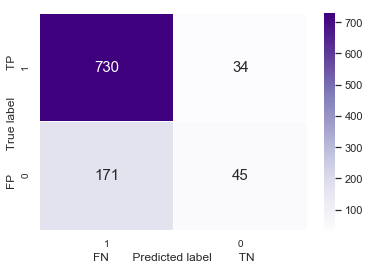

KNN Confusion Matrix: 
 [[702  62]
 [149  67]]



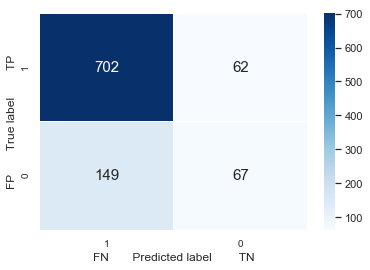

DT Confusion Matrix: 
 [[697  67]
 [ 80 136]]



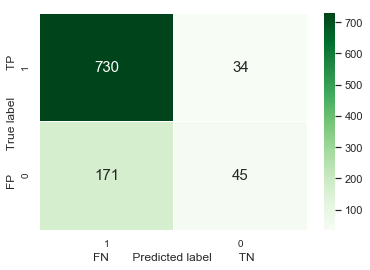

In [61]:
LR_confusion_mx = confusion_matrix(y_test, LR_pred, )
print("LR Confusion Matrix: \n", LR_confusion_mx)
print()

# visualisation
ax = plt.subplot()
sns.heatmap(LR_confusion_mx, annot=True, fmt='d', cmap="Purples", ax=ax, linewidths=0.5, annot_kws={'size':15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize=10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize=10)

plt.show()

KNN_confusion_mx = confusion_matrix(y_test, KNN_pred)
print("KNN Confusion Matrix: \n", KNN_confusion_mx)
print()

ax = plt.subplot()
sns.heatmap(KNN_confusion_mx, annot=True, fmt='d', cmap="Blues", ax=ax, linewidths=0.5, annot_kws={'size':15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize=10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize=10)

plt.show()

DT_confusion_mx = confusion_matrix(y_test, DT_pred)
print("DT Confusion Matrix: \n", DT_confusion_mx)
print()

ax = plt.subplot()
sns.heatmap(LR_confusion_mx, annot=True, fmt='d', cmap="Greens", ax=ax, linewidths=0.5, annot_kws={'size':15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize=10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize=10)

plt.show()

* ### ROC-AUC score

In [65]:
print('ROC-AUC score for LR:', roc_auc_score(LR_pred, y_test))
print('ROC-AUC score for KNN:', roc_auc_score(KNN_pred, y_test))     
print('ROC-AUC score for DT:', roc_auc_score(DT_pred, y_test))

ROC-AUC score for LR: 0.6899155649840543
ROC-AUC score for KNN: 0.6721458566756848
ROC-AUC score for DT: 0.7834953179780766


* ### Build, train and evaluate models with hyperparameters

In [71]:
# Logistic Regression
LR = LogisticRegression()
LR_params = {'C':[1,2,3,4,5,6,7,8,9,10], 'penalty':['l2'], 'solver':['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'], 'random_state':[0]}
LR1 = GridSearchCV(LR, param_grid = LR_params)
LR1.fit(X_train, y_train)
LR1_pred = LR1.predict(X_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN_params = {'n_neighbors':[5,7,9,11]}
KNN1 = GridSearchCV(KNN, param_grid = KNN_params)             
KNN1.fit(X_train, y_train)
KNN1_pred = KNN1.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier()
DT_params = {'max_depth':[2,10,15,20], 'criterion':['gini', 'entropy'], 'random_state':[0]}
DT1 = GridSearchCV(DT, param_grid = DT_params)
DT1.fit(X_train, y_train)
DT1_pred = DT1.predict(X_test)

In [72]:
# print the best hyper parameters set
print("Logistic Regression Best Hyper Parameters:   ", LR1.best_params_)
print("K-Nearest Neighbour Best Hyper Parameters:   ", KNN1.best_params_)
print("Decision Tree Best Hyper Parameters:         ", DT1.best_params_)

Logistic Regression Best Hyper Parameters:    {'C': 9, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}
K-Nearest Neighbour Best Hyper Parameters:    {'n_neighbors': 11}
Decision Tree Best Hyper Parameters:          {'criterion': 'entropy', 'max_depth': 10, 'random_state': 0}


* ### Classification report

In [73]:
print("LR Classification Report: \n", classification_report(y_test, LR1_pred, digits = 6))
print("KNN Classification Report: \n", classification_report(y_test, KNN1_pred, digits = 6))
print("DT Classification Report: \n", classification_report(y_test, DT1_pred, digits = 6))

LR Classification Report: 
               precision    recall  f1-score   support

           0   0.812990  0.950262  0.876282       764
           1   0.563218  0.226852  0.323432       216

   micro avg   0.790816  0.790816  0.790816       980
   macro avg   0.688104  0.588557  0.599857       980
weighted avg   0.757938  0.790816  0.754430       980

KNN Classification Report: 
               precision    recall  f1-score   support

           0   0.808296  0.943717  0.870773       764
           1   0.511364  0.208333  0.296053       216

   micro avg   0.781633  0.781633  0.781633       980
   macro avg   0.659830  0.576025  0.583413       980
weighted avg   0.742850  0.781633  0.744100       980

DT Classification Report: 
               precision    recall  f1-score   support

           0   0.866093  0.922775  0.893536       764
           1   0.644578  0.495370  0.560209       216

   micro avg   0.828571  0.828571  0.828571       980
   macro avg   0.755336  0.709073  0.726873

* ### Confusion matrix

LR Confusion Matrix


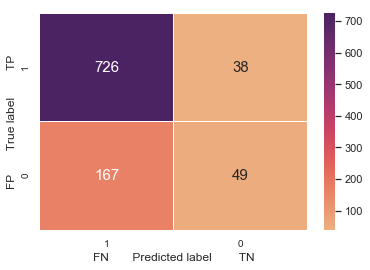


KNN Confusion Matrix


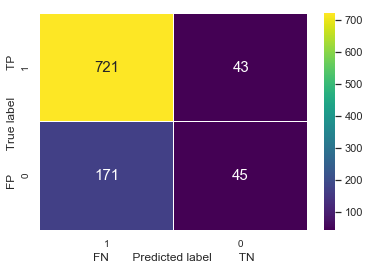


DT Confusion Matrix


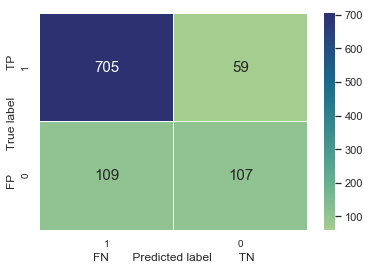

In [86]:
# confusion matrix of LR model
LR1_confusion_mx = confusion_matrix(y_test, LR1_pred)
print('LR Confusion Matrix')

# visualisation
ax = plt.subplot()
sns.heatmap(LR_confusion_mx, annot = True, fmt = 'd', cmap = 'flare', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

# confusion matrix of KNN model
KNN1_confusion_mx = confusion_matrix(y_test, KNN1_pred)
print('KNN Confusion Matrix')

# visualisation
ax = plt.subplot()
sns.heatmap(KNN_confusion_mx, annot = True, fmt = 'd', cmap = 'viridis', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

# confusion matrix of DT model
DT1_confusion_mx = confusion_matrix(y_test, DT1_pred)
print('DT Confusion Matrix')

# visualisation
ax = plt.subplot()
sns.heatmap(DT_confusion_mx, annot = True, fmt = 'd', cmap = 'crest', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

* ### ROC-AUC score

In [87]:
print('ROC-AUC score for LR with hyperparams:', roc_auc_score(LR1_pred, y_test))
print('ROC-AUC score for KNN with hyperparams:', roc_auc_score(KNN1_pred, y_test))     
print('ROC-AUC score for DT:with hyperparams:', roc_auc_score(DT1_pred, y_test))

ROC-AUC score for LR with hyperparams: 0.6881041562085698
ROC-AUC score for KNN with hyperparams: 0.6598298002445984
ROC-AUC score for DT:with hyperparams: 0.7553358396731891


##  Conclusion.

In [88]:
# submission of .csv file with predictions
sub = pd.DataFrame()
sub['ID'] = X_test.index
sub['quality'] = DT1_pred
sub.to_csv('WinePredictionsTest.csv', index=False)

In [90]:
print('Accuracy score for DT is:',accuracy_score(DT1_pred, y_test))

Accuracy score for DT is: 0.8285714285714286


**Question**: Predict which wines are 'Good/1' and 'Not Good/0' (use binary classification; check balance of classes; calculate perdictions; choose the best model).

**Answers**:

1. Binary classification was applied.

2. Classes were highly imbalanced with 78.36 % of '0' class and only 21.64 % of '1' class in our dataset. 

3. Three options were applied in order to calculate the best predictions:
    * Calculate predictions with imbalanced dataset
    * Calculate predictions with random under-sampling technique of an imbalanced dataset
    * Calculate predictions with random over-sampling technique of an imbalanced dataset
    
4. Three ML models were used: Logistic Regression, KNN, Decision Tree (without and with hyper parameters).

5. The best result was choosen: 
    * Random over-sampling dataset with 3838 entities in class '0' and 3838 entities in class '1', 7676 enteties in total.
    * Train/Test split: test_size=0.2, random_state=0
    * Decision Tree model with hyperparameters tuning, with an accuracy score equal to 0.8286 and ROC-AUC score equal to 0.7553.